In [ ]:
# A cell to run functions directly.
using Reexport
using Distributions
using Statistics
using GeoStats
using Random
using DataFrames
import GLMakie as Mke
using Infiltrator
using AbstractGPs
using Unitful
using Plots
using DataStructures
using POMDPs
include("../src/config.jl");
include("../src/pomdp.jl")
pomdp = CCSPOMDP();

FEATURE = :topSealThickness


In [2]:
visualize_gt(pomdp, 2)

### Test: Action function returns all actions

In [3]:
all_actions = POMDPs.actions(pomdp);

### Test: Observation function returns correct distributions

Distributions.ProductDistribution{2, 1, Vector{MixtureModel{Multivariate, Distributions.Continuous, MvNormal, Distributions.Categorical{Float64, Vector{Float64}}}}, Distributions.Continuous, Float64}
Reward: 9.499999999999998
Standard deviations of supplementary_points and 3 regular points: [200.0, 200.0, 200.0, 200.0, 9.986603587978816, 9.985631039456663, 9.985610493773262, 9.985610165802832, 9.985610160568251, 9.985610160484457, 9.985610160483365, 9.985610160483729, 9.985610160483365, 9.985610160485185, 9.985610160569344, 9.985610165802832, 9.985610493772898, 9.985631039457393, 9.986603587978816]
Standard deviations of supplementary_points and 3 regular points: [200.0, 200.0, 200.0, 200.0, 9.986603587978816, 9.985631039456663, 9.985610493773262, 9.985610165802832, 9.985610160568251, 9.985610160484457, 9.985610160483365, 9.985610160483729, 9.985610160483365, 9.985610160485185, 9.985610160569344, 9.985610165802832, 9.985610493772898, 9.985631039457393, 9.986603587978816]
Standard devia

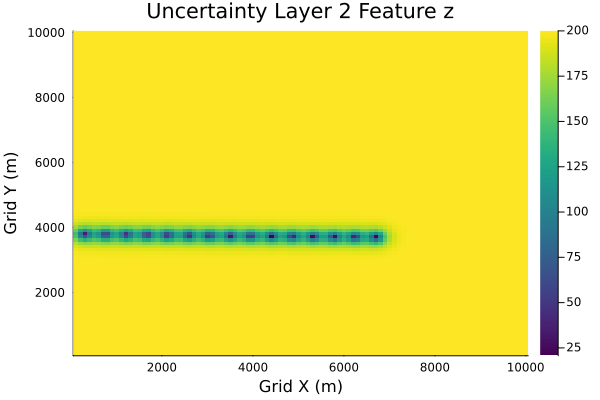

In [ ]:
# Taking a seismic line action first
distr = POMDPs.observation(pomdp, all_actions[21], pomdp.state)
reward = POMDPs.reward(pomdp, pomdp.state, all_actions[21])
println(typeof(distr), "\nReward: ", reward)

p1 = all_actions[21].geometry.vertices[1]
p2 = all_actions[21].geometry.vertices[2]
supp_points = [p1 * (1 - t) + p2 * t for t in range(0, stop=1, length=SEISMIC_N_POINTS)]

visualize_uncertainty(pomdp, 2, FEATURE, supp_points)

In [5]:
pomdp.rocktype_belief

5-element Vector{Distributions.Categorical{Float64, Vector{Float64}}}:
 Distributions.Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.3333333333333333, 0.3333333333333333, 0.3333333333333333])
 Distributions.Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.3333333333333333, 0.3333333333333333, 0.3333333333333333])
 Distributions.Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.3333333333333333, 0.3333333333333333, 0.3333333333333333])
 Distributions.Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.3333333333333333, 0.3333333333333333, 0.3333333333333333])
 Distributions.Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.3333333333333333, 0.3333333333333333, 0.3333333333333333])

In [6]:
distr = POMDPs.observation(pomdp, all_actions[2], pomdp.state);
pomdp.rocktype_belief

5-element Vector{Distributions.Categorical{Float64, Vector{Float64}}}:
 Distributions.Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.0, 1.0, 0.0])
 Distributions.Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.0, 1.0, 0.0])
 Distributions.Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.0, 1.0, 0.0])
 Distributions.Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.0, 1.0, 0.0])
 Distributions.Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.0, 0.0, 1.0])

Standard deviations of supplementary_points and 3 regular points: [200.0, 200.0, 200.0, 200.0, 9.98660358797736, 9.9856310394563, 9.985610493773262, 9.985610165802832, 9.985610160568251, 9.985610160484457, 9.985610160483729, 9.985610160483365, 9.985610160484093, 9.985610160485185, 9.985610160569708, 9.985610165803196, 9.985610493773262, 9.985631039457758, 9.986603587978452]


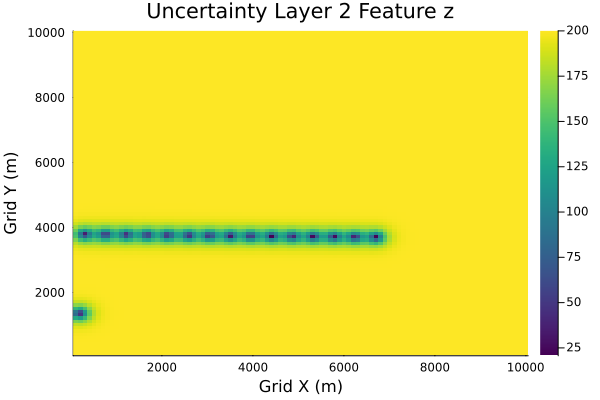

In [ ]:
visualize_uncertainty(pomdp, 2, FEATURE, supp_points)

Distributions.ProductDistribution{2, 1, Vector{MixtureModel{Multivariate, Distributions.Continuous, MvNormal, Distributions.Categorical{Float64, Vector{Float64}}}}, Distributions.Continuous, Float64}
Reward: 2.9228081027341795e9


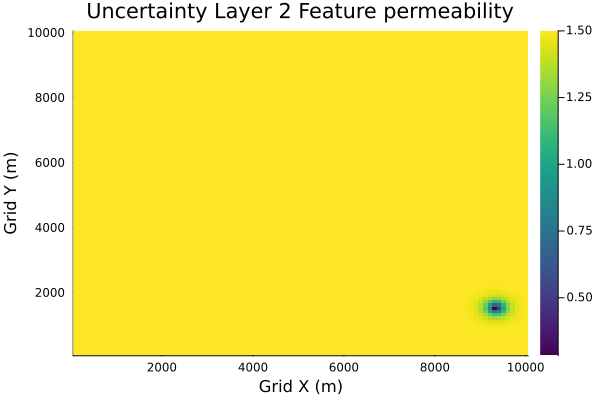

In [ ]:
reward = POMDPs.reward(pomdp, pomdp.state, all_actions[2])
println(typeof(distr), "\nReward: ", reward)

visualize_uncertainty(pomdp, 2, FEATURE)

  0.065622 seconds (1.34 M allocations: 68.035 MiB, 61.72% gc time)
  0.518970 seconds (10.55 M allocations: 555.415 MiB, 8.83% gc time)
Distributions.ProductDistribution{2, 1, Vector{MixtureModel{Multivariate, Distributions.Continuous, MvNormal, Distributions.Categorical{Float64, Vector{Float64}}}}, Distributions.Continuous, Float64}Reward: -2.3928809952361817e9


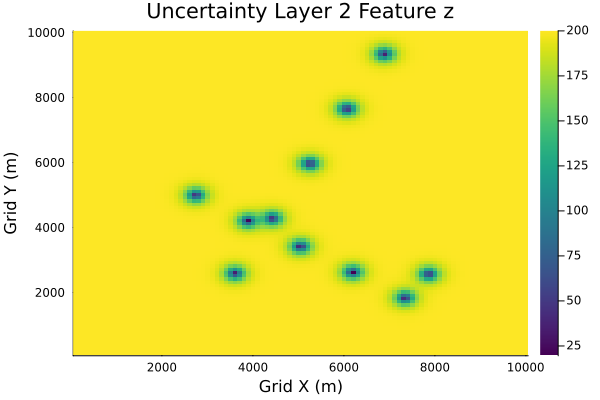

In [ ]:
# Timing test for seismic line observation and reward function
@time distr = POMDPs.observation(pomdp, all_actions[19], pomdp.state)
@time reward = POMDPs.reward(pomdp, pomdp.state, all_actions[19])
println(typeof(distr), "Reward: ", reward)
visualize_uncertainty(pomdp, 2, FEATURE)

  0.021854 seconds (424.77 k allocations: 21.567 MiB)
  0.680082 seconds (13.25 M allocations: 665.278 MiB, 12.49% gc time)
Distributions.ProductDistribution{2, 1, Vector{MixtureModel{Multivariate, Distributions.Continuous, MvNormal, Distributions.Categorical{Float64, Vector{Float64}}}}, Distributions.Continuous, Float64}Reward: -5.0261223368137205e8


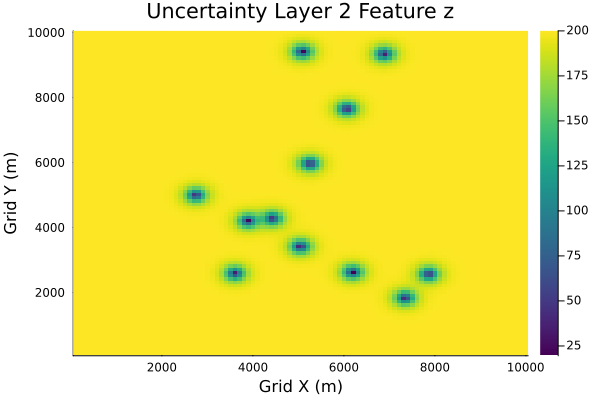

In [ ]:
# Timing test for well log observation and reward function
@time distr = POMDPs.observation(pomdp, all_actions[1], pomdp.state)
@time reward = POMDPs.reward(pomdp, pomdp.state, all_actions[1])
println(typeof(distr), "Reward: ", reward)
visualize_uncertainty(pomdp, 2, FEATURE)